<a href="https://colab.research.google.com/github/sourcecode369/TensorFlow-2.0/blob/master/tensorflow_2.0_docs/TensorFlow%20Core/Tutorials/Load%20and%20Preprocess%20Data/NumPy/TensorFlow_2_0_Load_and_preprocess_data_Load_NumPy_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install --upgrade tensorflow-gpu

     |████████████████████████████████| 380.8MB 46kB/s 
     |████████████████████████████████| 450kB 35.3MB/s 
     |████████████████████████████████| 3.8MB 25.0MB/s 
     |████████████████████████████████| 81kB 11.0MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.0.1 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
ERROR: tensorboard 2.0.1 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.6.3 which is incompatible.
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled goog

In [2]:
from __future__ import absolute_import, print_function, unicode_literals, division
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

DATA_URL = 'https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz'
path = tf.keras.utils.get_file('mnist.npz',DATA_URL)


11493376/11490434 [==============================] - 0s 0us/step


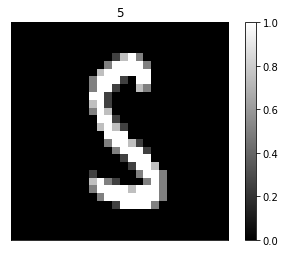

In [34]:
with np.load(path) as data:
  train_data = data['x_train']
  train_labels = data['y_train']
  test_data = data['x_test']
  test_labels = data['y_test']

def scale(features, labels):
  features = tf.cast(features, tf.float32)
  features = features / 255.0
  return  features, labels

BATCH_SIZE = 64
train_dataset = tf.data.Dataset.from_tensor_slices((train_data, train_labels)).cache().map(scale, tf.data.experimental.AUTOTUNE).shuffle(1000).batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)
test_dataset = tf.data.Dataset.from_tensor_slices((test_data, test_labels)).map(scale, tf.data.experimental.AUTOTUNE).cache().batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)

for features, labels in train_dataset.take(1):
  plt.imshow(features[1].numpy(),interpolation='nearest',cmap='gray')
  plt.title(labels[1].numpy())
  plt.xticks([])
  plt.yticks([])
  plt.colorbar()

In [0]:
strategy = tf.distribute.MirroredStrategy(cross_device_ops=tf.distribute.NcclAllReduce())

In [0]:
with strategy.scope():
  model = tf.keras.Sequential([
                               tf.keras.layers.Flatten(input_shape=(28,28)),
                               tf.keras.layers.Dense(128,activation=tf.nn.relu),
                               tf.keras.layers.Dense(64, activation=tf.nn.relu),
                               tf.keras.layers.Dense(10, activation=tf.nn.softmax)
  ])

  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
                loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
                metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])


In [37]:
with strategy.scope():
  model.fit(train_dataset, 
            epochs=10,
            validation_data=test_dataset, 
            verbose=1,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor='sparse_categorical_accuracy',patience=5,verbose=1),
                       tf.keras.callbacks.ReduceLROnPlateau(monitor='sparse_categorical_accuracy',patience=2,verbose=1)])

Epoch 1/10
938/938 [==============================] - 13s 14ms/step - loss: 0.2761 - sparse_categorical_accuracy: 0.9212 - val_loss: 0.0000e+00 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 2/10
938/938 [==============================] - 7s 8ms/step - loss: 0.1179 - sparse_categorical_accuracy: 0.9647 - val_loss: 0.1127 - val_sparse_categorical_accuracy: 0.9634
Epoch 3/10
938/938 [==============================] - 7s 8ms/step - loss: 0.0807 - sparse_categorical_accuracy: 0.9754 - val_loss: 0.0948 - val_sparse_categorical_accuracy: 0.9700
Epoch 4/10
938/938 [==============================] - 7s 8ms/step - loss: 0.0599 - sparse_categorical_accuracy: 0.9816 - val_loss: 0.1045 - val_sparse_categorical_accuracy: 0.9684
Epoch 5/10
938/938 [==============================] - 7s 8ms/step - loss: 0.0463 - sparse_categorical_accuracy: 0.9859 - val_loss: 0.0762 - val_sparse_categorical_accuracy: 0.9765
Epoch 6/10
938/938 [==============================] - 7s 8ms/step - loss: 0.0360 - sparse_